In [23]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [24]:
# Load the Titanic dataset
df = pd.read_csv("Titanic-Dataset.csv")

# Preview the data
print(df.head())
print(df.info())


   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
<c

In [25]:
# Check missing values
print(df.isnull().sum())


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [26]:
# Fill missing Age with median
df['Age'] = df['Age'].fillna(df['Age'].median())

# Fill missing Embarked with mode
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

# Drop Cabin (too many missing values)
df = df.drop('Cabin', axis=1)


In [27]:
# Extract Title from Name
df['Title'] = df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

# Create FamilySize
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1

# Create IsAlone feature
df['IsAlone'] = 0
df.loc[df['FamilySize'] == 1, 'IsAlone'] = 1

# Encode Sex (Safe replacement)
df['Sex'] = df['Sex'].replace({'male': 0, 'female': 1})

# Encode Embarked
df['Embarked'] = df['Embarked'].replace({'S': 0, 'C': 1, 'Q': 2})


In [28]:
# Drop columns not useful for model or Tableau
df = df.drop(['Name', 'Ticket', 'PassengerId'], axis=1)


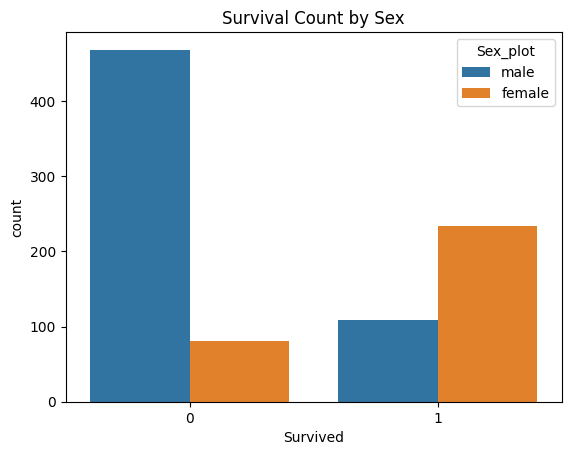

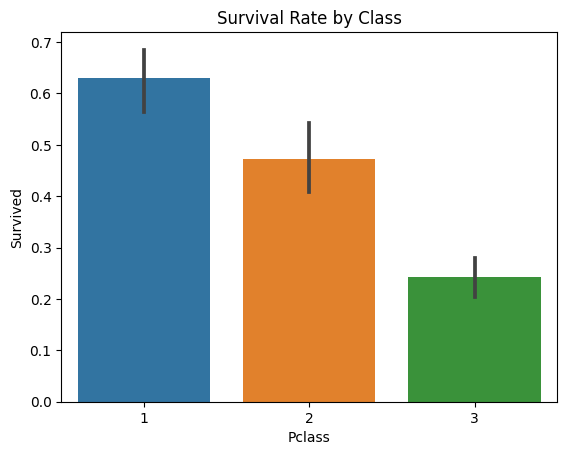

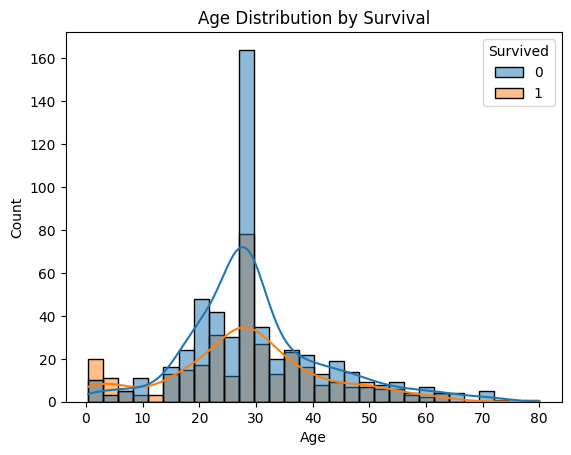

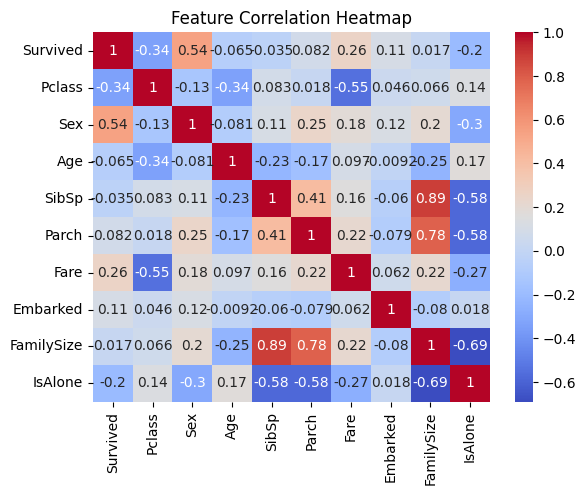

In [32]:

# Step 6: EDA

# Add Sex column for plotting
df['Sex_plot'] = df['Sex'].map({0: 'male', 1: 'female'})

# Countplot: Survival by Sex
sns.countplot(data=df, x='Survived', hue='Sex_plot')
plt.title("Survival Count by Sex")
plt.show()

# Barplot: Survival by Class
sns.barplot(data=df, x='Pclass', y='Survived')
plt.title("Survival Rate by Class")
plt.show()

# Histplot: Age Distribution by Survival
sns.histplot(data=df, x='Age', hue='Survived', kde=True)
plt.title("Age Distribution by Survival")
plt.show()

# Heatmap: Correlation Matrix (only numeric columns)
numeric_df = df.select_dtypes(include='number')
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()

# Step 7: Export for Tableau
df = df.drop('Sex_plot', axis=1)  # Optional: drop extra column used only for plots
df.to_excel("titanic_cleaned_for_tableau.xlsx", index=False)
